In [14]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
# Paths
train_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/train'  
test_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/test'

# Loading Images and Labels

In [30]:
#  Loading images and label
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  
    batch_size=32,         
    label_mode='int',       
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

Found 795 files belonging to 4 classes.


Found 201 files belonging to 4 classes.


In [31]:
# Class Names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['Mild Dementia', 'Moderate Dementia', 'No Dementia', 'Severe Dementia ']


## Normalizing Images

In [17]:
# Normalize the image data
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [18]:
input_shape = (256, 256, 3)

# ResNet 50 For Image Classification

In [19]:
# Creating the base model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)
base_model.trainable = False

In [20]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 524292    
                                                                 
Total params: 24112004 (91.98 MB)
Trainable params: 524292 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [22]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
# Training the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10 
)

Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 7.2917 - accuracy: 0.4692 - val_loss: 5.4468 - val_accuracy: 0.4925
Epoch 2/10
25/25 [==============================] - 24s 970ms/step - loss: 2.9850 - accuracy: 0.5648 - val_loss: 1.2048 - val_accuracy: 0.8109
Epoch 3/10
25/25 [==============================] - 24s 951ms/step - loss: 0.6483 - accuracy: 0.8176 - val_loss: 0.4217 - val_accuracy: 0.9055
Epoch 4/10
25/25 [==============================] - 23s 932ms/step - loss: 0.1970 - accuracy: 0.9736 - val_loss: 0.1033 - val_accuracy: 0.9751
Epoch 5/10
25/25 [==============================] - 23s 934ms/step - loss: 0.0815 - accuracy: 0.9962 - val_loss: 0.0778 - val_accuracy: 0.9851
Epoch 6/10
25/25 [==============================] - 23s 937ms/step - loss: 0.0911 - accuracy: 0.9849 - val_loss: 0.0908 - val_accuracy: 0.9900
Epoch 7/10
25/25 [==============================] - 24s 956ms/step - loss: 0.0574 - accuracy: 0.9987 - val_loss: 0.0569 - val_accuracy: 0.9950
Ep

## Model Metrics

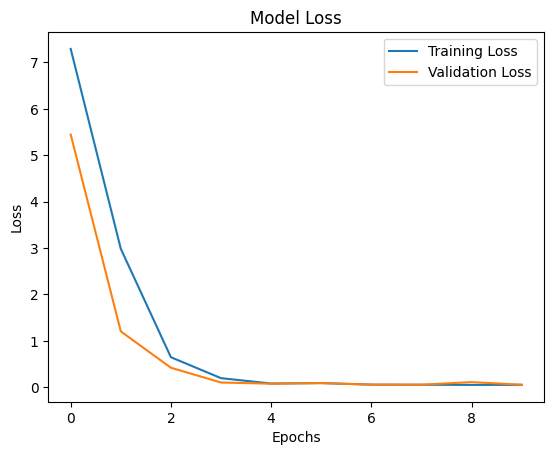

In [24]:
# Training & validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

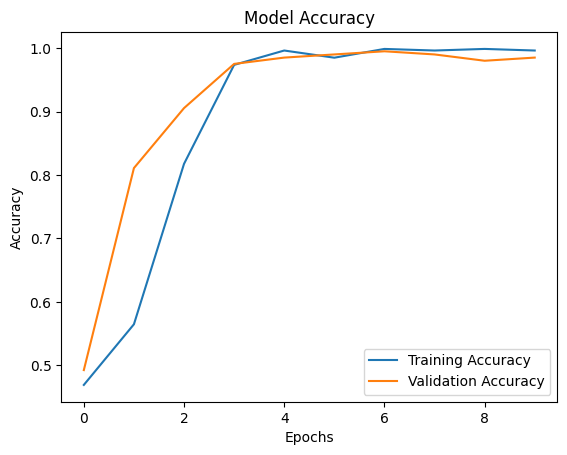

In [25]:
# Training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [26]:
# Metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Training Accuracy: {final_train_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")

Final Training Loss: 0.05341209098696709
Final Validation Loss: 0.0552157498896122
Final Training Accuracy: 0.99622642993927
Final Validation Accuracy: 0.9850746393203735


7/7 [==============================] - 5s 677ms/step


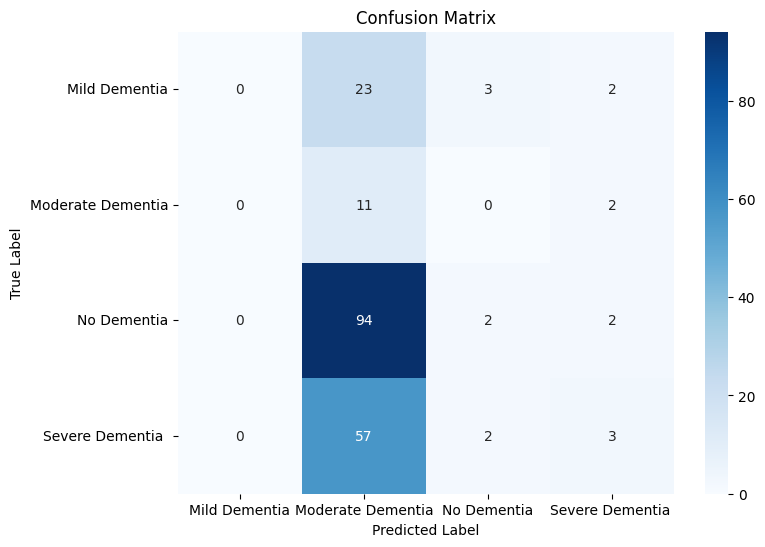

In [32]:
# Confusion Matrix
y_pred = np.argmax(model.predict(test_dataset), axis=-1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()